1. In this problem we use the OnlineNews dataset available on Canvas. The
dataset is about predicting the popularity of websites from 58 features. Discard the
first two variables (url and timedelta) from the data. From the remaining variables use
all but the last variable as predictors and the log of the last last variable (log(shares)) as
the response.

In [27]:
# Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Import the data
ONP = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/OnlineNewsPopularity/OnlineNewsPopularity.csv", sep=", ")
ONP.head()

/var/folders/2j/pln9c2h57fg2j_cjvf23spnm0000gn/T/ipykernel_26672/317613779.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ONP = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/OnlineNewsPopularity/OnlineNewsPopularity.csv", sep=", ")


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
# Discard the first variable "url" and the second variable "timedelta"
ONP = ONP.drop(columns=['url', 'timedelta'])
ONP.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Obtain all results using 5-fold cross-validation, which is computed as follows:
1. Generate a random permutation of the data. Use this random permutation to split
the data into 5 disjoint subsets of almost equal size (7928 or 7929 observations
each).
2. For each fold i ∈ {1, ..., 5}, train the model on all data except subset i and test it
on subset i, obtaining test error εi.
3. Obtain the final test error as the average of the 5 test errors εi obtained above.

In [6]:
# Split the data up to count all except the last column as predictor variables, and the last column as a response variable
X = ONP[ONP.columns[:-1]]
Y = ONP[ONP.columns[-1]]


In [7]:
# We want the response variable to be log(shares) instead of just shares
Y = np.log(Y)

In [8]:
# Check to see if this worked 
Y.head()

0    6.385194
1    6.566672
2    7.313220
3    7.090077
4    6.224558
Name: shares, dtype: float64

a) Null model. Report the average train and test MSE of the null model that always
predicts training  ̄y (average training y)

In [9]:
# 5-Fold Cross-Validation 
kf = KFold(n_splits = 5, shuffle = True)
training_mse_list = []
testing_mse_list = []
for train, test in kf.split(X):
    Y_train = Y[train]
    Y_test = Y[test]
    # Predict the mean for all values
    Y_train_predictions = Y_train.mean()
    # Calculate the MSE = (1/n) * summation [(y - y_prediction)^2
    training_mse = np.mean((Y_train - Y_train_predictions)**2)
    testing_mse = np.mean((Y_test - Y_train_predictions)**2)
    training_mse_list.append(training_mse)
    testing_mse_list.append(testing_mse)
average_training_mse_a = np.mean(training_mse_list)
average_testing_mse_a = np.mean(testing_mse_list)

print("Average of the 5 training MSE values:", average_training_mse_a)
print("Average of the 5 testing MSE values:", average_testing_mse_a)



Average of the 5 training MSE values: 0.8657795889592773
Average of the 5 testing MSE values: 0.8658081877378379


b)	OLS regression computed analytically by solving the following normal equations: 
[( 1/N) XT X + λIp)]β = (1/N) XT Y where λ ∈ {0, 10^-5, 10^−4, 10^−3, 10^−2, 10^−1} and N is the number of observations in X. Report in a table the average TRAINING and TEST R^2 and MSE as well as THEIR STANDARD DEVIATIONS obtained from the 5 folds. On the same graph, plot the average TRAINING and TEST MSE vs λ as two separate curves. Also plot the average value of the logarithm of the determinant of [( 1/N) XT X + λIp)] vs λ.


In [10]:
# Start the 5-Fold Cross Validation and set up the average MSE, R^2, and St Dev values for later
kf = KFold(n_splits = 5, shuffle = True)
given_lambda = [0, .00001, .0001, .001, .01, .1]
average_training_mse_b = []
average_training_mse_stdev_b =[]
average_testing_mse_b = []
average_testing_mse_stdev_b =[]
average_training_rsq_b = []
average_training_rsq_stdev_b =[]
average_testing_rsq_b = []
average_testing_rsq_stdev_b =[]
average_log_of_determinant = []

In [11]:
for i in given_lambda:
    training_mse_lists =[]
    testing_mse_lists = []
    training_rsq_lists = []
    testing_rsq_lists = []
    training_stdev_lists = []
    testing_stdev_lists = []
    log_of_determinant_lists = []
    for train, test in kf.split(X):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        Y_train = Y.iloc[train]
        Y_test = Y.iloc[test]
        N, predictors = X_train.shape
        A = (1/N) * (X_train.T @ X_train) + i * np.eye(predictors)
        B = (1/N) * (X_train.T @ Y_train)
        result = np.linalg.solve(A, B)
        Y_training_prediction = X_train @ result
        Y_testing_prediction = X_test @ result
        log_of_determinant_lists.append(np.log(np.linalg.det(A)))
        # Calculate the MSE = (1/n) * summation [(y - y_prediction)^2] and put the MSE for each fold in the appropriate mse_lists
        Y_training_mse = np.mean((Y_train - Y_training_prediction)**2)
        Y_testing_mse = np.mean((Y_test - Y_testing_prediction)**2)
        training_mse_lists.append(Y_training_mse)
        testing_mse_lists.append(Y_testing_mse)
        # Calculate the R^2 = 1 - (SSE / SST) where SSE = summation [(y-y_prediction)^2] and SST = summation[(y-y_mean)^2]
        training_sse = np.sum((Y_train - Y_training_prediction)**2)
        training_sst = np.sum((Y_train - np.mean(Y_train))**2)
        training_rsq = 1 - (training_sse / training_sst)
        training_rsq_lists.append(training_rsq)
        testing_sse = np.sum((Y_test - Y_testing_prediction)**2)
        testing_sst = np.sum((Y_test - np.mean(Y_test))**2)
        testing_rsq = 1 - (testing_sse / testing_sst)
        testing_rsq_lists.append(testing_rsq)
    # Now that we have our MSE, R^2, and log(determinant) for each, we want to calculate the average of the folds to get our overall values. Also, calculate the St Dev
    average_training_mse_b.append(np.mean(training_mse_lists))
    average_training_mse_stdev_b.append(np.std(training_mse_lists))
    average_testing_mse_b.append(np.mean(testing_mse_lists))
    average_testing_mse_stdev_b.append(np.std(testing_mse_lists))
    average_training_rsq_b.append(np.mean(training_rsq_lists)) 
    average_training_rsq_stdev_b.append(np.std(training_rsq_lists))
    average_testing_rsq_b.append(np.mean(testing_rsq_lists))
    average_testing_rsq_stdev_b.append(np.std(testing_rsq_lists))
    average_log_of_determinant.append(np.mean(log_of_determinant_lists))
 # Print the functions 
print("The average of the 5 training MSE values for each depth is:", average_training_mse_b)
print("The standard deviation of the 5 training MSE values for each depth is:", average_training_mse_stdev_b)
print("The average of the 5 testing MSE values for each depth is:", average_testing_mse_b)
print("The standard deviation of the 5 testing MSE values for each depth is:", average_testing_mse_stdev_b)
print("The average of the 5 training R^2 values for each depth is:", average_training_rsq_b)
print("The standard deviation of the 5 training R^2 values for each depth is:", average_training_rsq_stdev_b)
print("The average of the 5 testing R^2 values for each depth is:", average_testing_rsq_b)
print("The standard deviation of the 5 testing R^2 values for each depth is:", average_testing_rsq_stdev_b)
print("The average log of the determinant for each depth is:", average_log_of_determinant)
# Transform this into a table / dataframe for cleaner output
output_df = pd.DataFrame({

    "lambda": given_lambda,
    "Avg Training MSE": average_training_mse_b,
    "Std Dev Training MSE": average_training_mse_stdev_b,
    "Avg Testing MSE": average_testing_mse_b,
    "Std Dev Testing MSE": average_testing_mse_stdev_b,
    "Avg Training R-Squared": average_training_rsq_b,
    "Std Dev Training R-Squared": average_training_rsq_stdev_b,
    "Avg Testing R-Squared": average_testing_rsq_b,
    "Std Dev Testing R-Squared": average_testing_rsq_stdev_b,
    "Avg Log(Determinant)": average_log_of_determinant 
})
print()
print()
print(output_df.to_string())



/var/folders/2j/pln9c2h57fg2j_cjvf23spnm0000gn/T/ipykernel_26672/1771729297.py:20: RuntimeWarning: invalid value encountered in log
  log_of_determinant_lists.append(np.log(np.linalg.det(A)))
/var/folders/2j/pln9c2h57fg2j_cjvf23spnm0000gn/T/ipykernel_26672/1771729297.py:20: RuntimeWarning: invalid value encountered in log
  log_of_determinant_lists.append(np.log(np.linalg.det(A)))
/var/folders/2j/pln9c2h57fg2j_cjvf23spnm0000gn/T/ipykernel_26672/1771729297.py:20: RuntimeWarning: invalid value encountered in log
  log_of_determinant_lists.append(np.log(np.linalg.det(A)))


The average of the 5 training MSE values for each depth is: [0.7556169028035444, 0.755626735412777, 0.7561279766406539, 0.780428808569696, 0.9229135245177428, 1.034253563615325]
The standard deviation of the 5 training MSE values for each depth is: [0.0027442881622045, 0.004614222686100403, 0.003449212942764128, 0.0019514486232813104, 0.004537006417411438, 0.0037194492683860435]
The average of the 5 testing MSE values for each depth is: [0.7591839907513785, 2.4938986396876146, 1.4675432418910337, 2.9923782777305687, 4.803838632391378, 1.7397334559999185]
The standard deviation of the 5 testing MSE values for each depth is: [0.011091231871293851, 3.4787481399765716, 1.4171714689802635, 4.417111003019657, 7.727405239244528, 1.409126480514188]
The average of the 5 training R^2 values for each depth is: [0.12723736201769026, 0.12722584342726312, 0.12664493998412912, 0.09856969515363953, -0.06602350747079347, -0.19460778221579633]
The standard deviation of the 5 training R^2 values for each

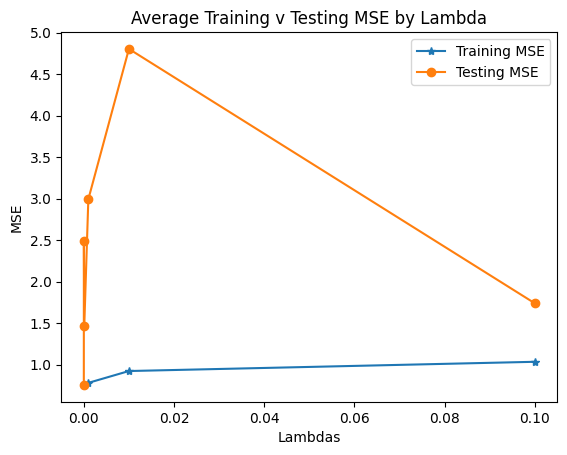

In [16]:
# Plot the average training and testing MSE vs the lambdas 
plt.figure()
plt.plot(given_lambda, average_training_mse_b, marker="*", label="Training MSE")
plt.plot(given_lambda, average_testing_mse_b, marker="o", label="Testing MSE")
plt.xlabel("Lambdas")
plt.ylabel("MSE")
plt.title("Average Training v Testing MSE by Lambda")
plt.legend()
plt.show()

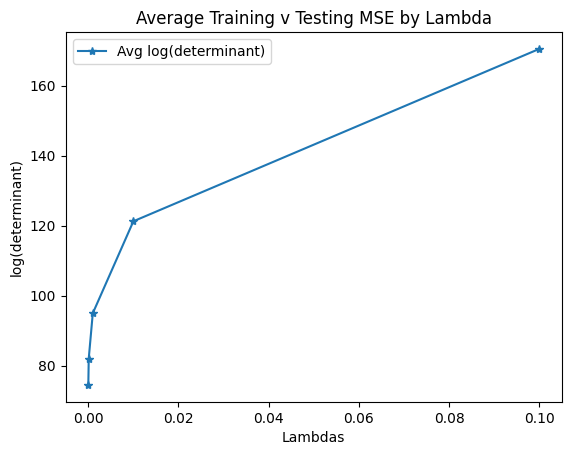

In [17]:
# Plot the average log(determinant) v the lambdas 
plt.figure()
plt.plot(given_lambda, average_log_of_determinant, marker="*", label="Avg log(determinant)")
plt.xlabel("Lambdas")
plt.ylabel("log(determinant)")
plt.title("Average Training v Testing MSE by Lambda")
plt.legend()
plt.show()

c)	Regression tree of maximum depth 1, 2, …, up to 10, for a total of 10 regression trees. On the same plot, plot the average TRAINING and TEST R^2 vs the tree depth as two separate curves. On another plot, plot the average TRAINING and TEST MSE vs the tree depth, and show the null model from a) as a horizontal line.

In [19]:
# Start the 5-Fold Cross Validation and set up the average MSE and R^2 values for later
kf = KFold(n_splits = 5, shuffle = True)
average_training_mse_c = []
average_testing_mse_c = []
average_training_rsq_c = []
average_testing_rsq_c = []

In [20]:
# Calculate the MSE and R^2 for each depth (1-10) inside each fold
for i in range(1, 11):
    # Set up the MSE and R^2 for each fold 1-5
    training_mse_lists =[]
    testing_mse_lists = []
    training_rsq_lists = []
    testing_rsq_lists = []
    for train, test in kf.split(X):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        Y_train = Y.iloc[train]
        Y_test = Y.iloc[test]
        # Inside each fold, we need to run the regression tree up to 10 depths
        tree = DecisionTreeRegressor(max_depth = i)
        tree.fit(X_train, Y_train)
        # Using this tree above, make predictions
        Y_training_predictions = tree.predict(X_train)
        Y_testing_predictions = tree.predict(X_test)
        # Calculate the MSE = (1/n) * summation [(y - y_prediction)^2] and put the MSE for each fold in the appropriate mse_lists
        Y_training_mse = np.mean((Y_train - Y_training_predictions)**2)
        Y_testing_mse = np.mean((Y_test - Y_testing_predictions)**2)
        training_mse_lists.append(Y_training_mse)
        testing_mse_lists.append(Y_testing_mse)
        # Calculate the R^2 = 1 - (SSE / SST) where SSE = summation [(y-y_prediction)^2] and SST = summation[(y-y_mean)^2]
        training_sse = np.sum((Y_train - Y_training_predictions)**2)
        training_sst = np.sum((Y_train - np.mean(Y_train))**2)
        training_rsq = 1 - (training_sse / training_sst)
        training_rsq_lists.append(training_rsq)
        testing_sse = np.sum((Y_test - Y_testing_predictions)**2)
        testing_sst = np.sum((Y_test - np.mean(Y_test))**2)
        testing_rsq = 1 - (testing_sse / testing_sst)
        testing_rsq_lists.append(testing_rsq)
# Now that we have our mse and rsq for each tree, we want to calculate the average of the folds to get our overall values
    average_training_mse_c.append(np.mean(training_mse_lists))
    average_testing_mse_c.append(np.mean(testing_mse_lists))
    average_training_rsq_c.append(np.mean(training_rsq_lists)) 
    average_testing_rsq_c.append(np.mean(testing_rsq_lists))
print("The average of the 5 training MSE values for each depth is:", average_training_mse_c)
print("The average of the 5 testing MSE values for each depth is:", average_testing_mse_c)
print("The average of the 5 training R^2 values for each depth is:", average_training_rsq_c)
print("The average of the 5 testing R^2 values for each depth is:", average_testing_rsq_c)

# Transform this into a table / dataframe for cleaner output
output_df_c = pd.DataFrame({
    "Avg Training MSE": average_training_mse_c,
    "Avg Testing MSE": average_testing_mse_c,
    "Avg Training R-Squared": average_training_rsq_c,
    "Avg Testing R-Squared": average_testing_rsq_c,
})
print()
print()
print(output_df_c.to_string())




The average of the 5 training MSE values for each depth is: [0.819797215546078, 0.8006411678092652, 0.7865117441537716, 0.7737911591724441, 0.7596477482632571, 0.7427802728254753, 0.7203951580861581, 0.6924816946535752, 0.657544350870322, 0.6205571969027128]
The average of the 5 testing MSE values for each depth is: [0.8211138584303631, 0.8035109123238829, 0.7916726081080901, 0.7840234881843484, 0.7766635922756621, 0.7794290521371708, 0.7827841484726974, 0.8138480161653401, 0.8286200374870176, 0.8782821228154833]
The average of the 5 training R^2 values for each depth is: [0.05311719017337648, 0.07523424395668063, 0.09154886887166036, 0.10624954310729026, 0.12258177524176155, 0.14206691860616766, 0.16791436108137364, 0.2001481776730703, 0.24052934280968602, 0.2832632674384069]
The average of the 5 testing R^2 values for each depth is: [0.05164127306058626, 0.07184425652376022, 0.08544239755876919, 0.0943330862640138, 0.10284027920767011, 0.09962776891090708, 0.09559460525454469, 0.0595

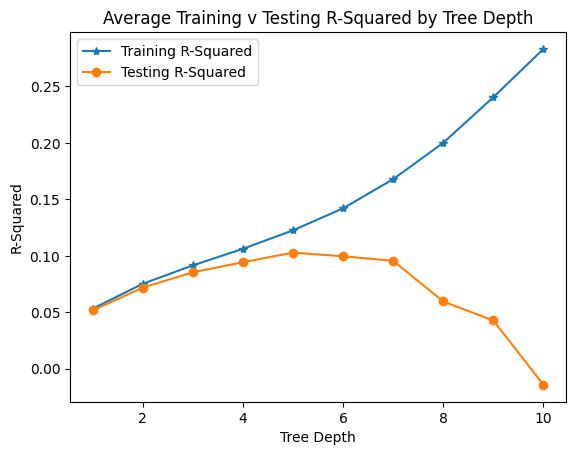

In [21]:
# Plot the average training and testing R^2 vs the tree depths
plt.figure()
plt.plot(range(1, 11), average_training_rsq_c, marker="*", label="Training R-Squared")
plt.plot(range(1, 11), average_testing_rsq_c, marker="o", label="Testing R-Squared")
plt.xlabel("Tree Depth")
plt.ylabel("R-Squared")
plt.title("Average Training v Testing R-Squared by Tree Depth")
plt.legend()
plt.show()


In [22]:
# Calculate the null MSE from a)
training_mse_list_a = []
testing_mse_list_a = []
fold = 0
for train, test in kf.split(X):
    fold = fold + 1
    Y_train = Y[train]
    Y_test = Y[test]
    Y_train_mean = Y_train.mean()
    training_mse = np.mean((Y_train - Y_train_mean)**2)
    testing_mse = np.mean((Y_test - Y_train_mean)**2)
    training_mse_list_a.append(training_mse)
    testing_mse_list_a.append(testing_mse)
average_training_mse_a = np.mean(training_mse_list_a)
average_testing_mse_a = np.mean(testing_mse_list_a)

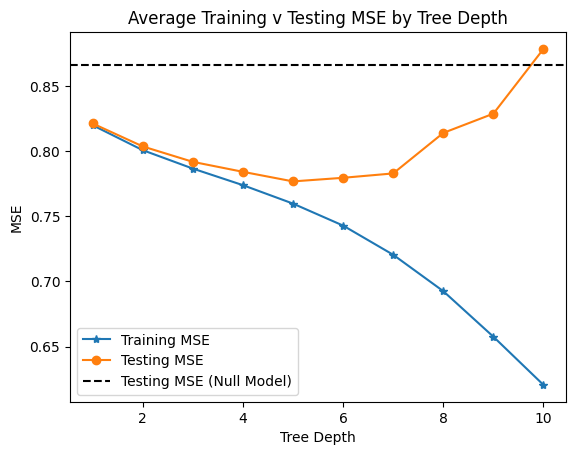

In [23]:
# Plot the average training and testing MSE vs the tree depths
plt.figure()
plt.plot(range(1, 11), average_training_mse_c, marker="*", label="Training MSE")
plt.plot(range(1, 11), average_testing_mse_c, marker="o", label="Testing MSE")
plt.axhline(average_testing_mse_a, color="k", linestyle="--", label = "Testing MSE (Null Model)")
plt.xlabel("Tree Depth")
plt.ylabel("MSE")
plt.title("Average Training v Testing MSE by Tree Depth")
plt.legend()
plt.show()

d) Report the average TRAINING, OOB, and TEST R^2 and MSE and THEIR STANDARD DEVIATION in each case. On the same plot, plot the average TRAINING, OOB, and TEST R^2 vs the maximum depth as three separate curves. How does the average OOB R^2 compare to the test R^2.

In [25]:
# Start the 5-Fold Cross Validation and set up the average MSE, R^2, and St Dev values for later
kf = KFold(n_splits = 5, shuffle = True)
average_training_mse_d = []
average_training_mse_stdev_d = []
average_oob_mse_d = []
average_oob_mse_stdev_d = []
average_testing_mse_d = []
average_testing_mse_stdev_d = []

average_training_rsq_d = []
average_training_rsq_stdev_d = []
average_oob_rsq_d = []
average_oob_rsq_stdev_d = []
average_testing_rsq_d = []
average_testing_rsq_stdev_d = []

In [28]:
# Calculate the MSE, R^2, and St Dev for a forest of 300 trees for each depth (1-10) inside each fold
for i in range(1, 11):
    # Set up the MSE and R^2 for each fold 1-5
    training_mse_lists =[]
    oob_mse_lists = []
    testing_mse_lists = []
    training_rsq_lists = []
    oob_rsq_lists = []
    testing_rsq_lists = []
    training_stdev_lists = []
    oob_stdev_lists = []
    testing_stdev_lists = []
    for train, test in kf.split(X):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        Y_train = Y.iloc[train]
        Y_test = Y.iloc[test]
        # Inside each fold, we need to run the regression tree up to 10 depths
        forest = RandomForestRegressor(n_estimators = 300, max_depth=i, oob_score=True, n_jobs=-1)
        forest.fit(X_train, Y_train)
        # Using this tree above, make predictions
        Y_training_predictions = forest.predict(X_train)
        Y_testing_predictions = forest.predict(X_test)
        oob_predictions = forest.oob_prediction_
        # Calculate the MSE = (1/n) * summation [(y - y_prediction)^2] and put the MSE for each fold in the appropriate mse_lists
        Y_training_mse = np.mean((Y_train - Y_training_predictions)**2)
        Y_testing_mse = np.mean((Y_test - Y_testing_predictions)**2)
        oob_mse = np.mean((Y_train - oob_predictions)**2)
        training_mse_lists.append(Y_training_mse)
        testing_mse_lists.append(Y_testing_mse)
        oob_mse_lists.append(oob_mse)
        # Calculate the R^2 = 1 - (SSE / SST) where SSE = summation [(y-y_prediction)^2] and SST = summation[(y-y_mean)^2]
        training_sse = np.sum((Y_train - Y_training_predictions)**2)
        training_sst = np.sum((Y_train - np.mean(Y_train))**2)
        training_rsq = 1 - (training_sse / training_sst)
        training_rsq_lists.append(training_rsq)
        testing_sse = np.sum((Y_test - Y_testing_predictions)**2)
        testing_sst = np.sum((Y_test - np.mean(Y_test))**2)
        testing_rsq = 1 - (testing_sse / testing_sst)
        testing_rsq_lists.append(testing_rsq)
        oob_rsq = forest.oob_score_
        oob_rsq_lists.append(oob_rsq)
# Now that we have our mse and R^2 for each, we want to calculate the average of the folds to get our overall values. Also, calculate the St Dev
    average_training_mse_d.append(np.mean(training_mse_lists))
    average_training_mse_stdev_d.append(np.std(training_mse_lists))
    average_oob_mse_d.append(np.mean(oob_mse_lists))
    average_oob_mse_stdev_d.append(np.std(oob_mse_lists))
    average_testing_mse_d.append(np.mean(testing_mse_lists))
    average_testing_mse_stdev_d.append(np.std(testing_mse_lists))
    average_training_rsq_d.append(np.mean(training_rsq_lists)) 
    average_training_rsq_stdev_d.append(np.std(training_rsq_lists))
    average_oob_rsq_d.append(np.mean(oob_rsq_lists)) 
    average_oob_rsq_stdev_d.append(np.std(oob_rsq_lists))
    average_testing_rsq_d.append(np.mean(testing_rsq_lists))
    average_testing_rsq_stdev_d.append(np.std(testing_rsq_lists))
 # Print the functions 
print("The average of the 5 training MSE values for each depth is:", average_training_mse_d)
print("The standard deviation of the 5 training MSE values for each depth is:", average_training_mse_stdev_d)
print("The average of the 5 OOB MSE values for each depth is:", average_oob_mse_d)
print("The standard deviation of the 5 OOB MSE values for each depth is:", average_oob_mse_stdev_d)
print("The average of the 5 testing MSE values for each depth is:", average_testing_mse_d)
print("The standard deviation of the 5 testing MSE values for each depth is:", average_testing_mse_stdev_d)
print("The average of the 5 training R^2 values for each depth is:", average_training_rsq_d)
print("The standard deviation of the 5 training R^2 values for each depth is:", average_training_rsq_stdev_d)
print("The average of the 5 OOB R^2 values for each depth is:", average_oob_rsq_d)
print("The standard deviation of the 5 OOB R^2 values for each depth is:", average_oob_rsq_stdev_d)
print("The average of the 5 testing R^2 values for each depth is:", average_testing_rsq_d)
print("The standard deviation of the 5 testing R^2 values for each depth is:", average_testing_rsq_stdev_d)

# Transform this into a table / dataframe for cleaner output
output_df_c = pd.DataFrame({
    "Avg Training MSE": average_training_mse_d,
    "Avg Training MSE St Dev": average_training_mse_stdev_d,
    "Avg OOB MSE": average_oob_mse_d,
    "Avg OOB MSE St Dev": average_oob_mse_stdev_d,
    "Avg Testing MSE": average_testing_mse_d,
    "Avg Testing MSE St Dev": average_testing_mse_stdev_d,
    "Avg Training R-Squared": average_training_rsq_d,
    "Avg Training R-Squared St Dev": average_training_rsq_stdev_d,
    "Avg OOB R-Squared": average_oob_rsq_d,
    "Avg OOB R-Squared St Dev": average_oob_rsq_stdev_d,
    "Avg Testing R-Squared": average_testing_rsq_d,
    "Avg Testing R-Squared St Dev": average_testing_rsq_stdev_d,
})
print()
print()
print(output_df_c.to_string())


The average of the 5 training MSE values for each depth is: [0.8178135273993729, 0.7945419269343823, 0.775158173803548, 0.7581984260519359, 0.7401381946144281, 0.7179290822868312, 0.6896684149129102, 0.6539592890059854, 0.6116290893134685, 0.5642968078958369]
The standard deviation of the 5 training MSE values for each depth is: [0.003501589699181023, 0.004309152230450658, 0.0036943651693412327, 0.003483933693335031, 0.0036813853190588437, 0.0034718051080086356, 0.0037971104550379364, 0.004176111281664102, 0.00274291608363246, 0.006259392045809422]
The average of the 5 OOB MSE values for each depth is: [0.8186791548378064, 0.7971336243476168, 0.7798007681109091, 0.7673676366203548, 0.7579354144745225, 0.7507753005175004, 0.7459102741661956, 0.7417895687503512, 0.7387435782285173, 0.736062814182904]
The standard deviation of the 5 OOB MSE values for each depth is: [0.00351832047737926, 0.004326863258016876, 0.0035998456869381734, 0.003389261304097932, 0.0036124783727286996, 0.0036733779

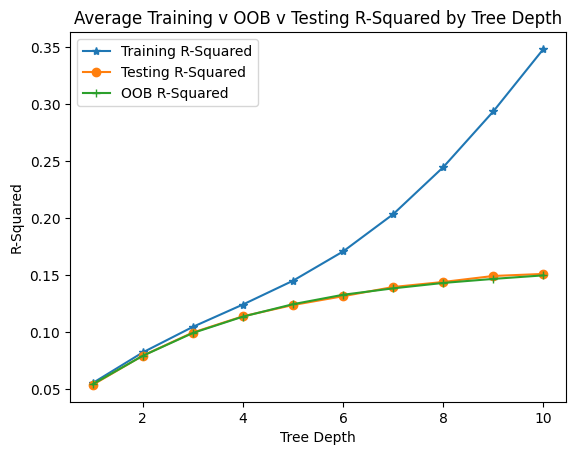

In [29]:
# Plot the average training, oob, and testing R^2 vs the tree depths
plt.figure()
plt.plot(range(1, 11), average_training_rsq_d, marker="*", label="Training R-Squared")
plt.plot(range(1, 11), average_testing_rsq_d, marker="o", label="Testing R-Squared")
plt.plot(range(1, 11), average_oob_rsq_d, marker="+", label="OOB R-Squared")
plt.xlabel("Tree Depth")
plt.ylabel("R-Squared")
plt.title("Average Training v OOB v Testing R-Squared by Tree Depth")
plt.legend()
plt.show()